In [ ]:
#Imports necessary libraries for data analysis, preprocessing, modeling, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR, LinearSVR
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [ ]:
# Loads the dataset Playstore_final.csv and displays the first few rows.
df = pd.read_csv('/content/Playstore_final.csv')
df.head()

,App Name,App Id,Category,Rating,Installs,Minimum Installs,Free,Price,Currency,Size,Minimum Android,Released,Content Rating,Ad Supported,In app purchases,Editor Choice,Summary,Android version Text,Developer,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,"10,000+",10000.0,True,0.0,USD,5.8M,4,"Jul 19, 2017",Everyone,True,False,False,Leading Online Learning and Training System in...,4.0 and up,eniseistudio,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,"1,000+",1000.0,True,0.0,USD,5.3M,4,"May 5, 2017",Everyone,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,4.0 and up,eniseistudio,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,"10,000+",10000.0,True,0.0,USD,5.7M,4,"Jul 18, 2017",Everyone,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",4.0 and up,eniseistudio,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,"5,000+",5000.0,True,0.0,USD,5.8M,4,"Jun 24, 2017",Everyone,True,False,False,Medical Assistant Degree Medical Assistant Job...,4.0 and up,eniseistudio,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,"50,000+",50000.0,True,0.0,USD,5.7M,4,"Jun 13, 2017",Everyone,True,False,False,"Business Administration Learning, Business Adm...",4.0 and up,eniseistudio,1.1.6


In [ ]:
#  Displays the column names of the dataset.
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Installs',
       'Minimum Installs', 'Free', 'Price', 'Currency', 'Size',
       'Minimum Android', 'Released', 'Content Rating', 'Ad Supported',
       'In app purchases', 'Editor Choice', 'Summary', 'Android version Text',
       'Developer', 'Version'],
      dtype='object')

In [ ]:
# Shows the shape of the dataset (rows × columns).
df.shape

(450795, 20)

In [ ]:
# Gives a summary of the DataFrame including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450795 entries, 0 to 450794
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   App Name              450782 non-null  object 
 1   App Id                450795 non-null  object 
 2   Category              450782 non-null  object 
 3   Rating                447983 non-null  float64
 4   Installs              450704 non-null  object 
 5   Minimum Installs      450782 non-null  float64
 6   Free                  450703 non-null  object 
 7   Price                 450703 non-null  float64
 8   Currency              450703 non-null  object 
 9   Size                  450767 non-null  object 
 10  Minimum Android       449713 non-null  object 
 11  Released              447348 non-null  object 
 12  Content Rating        450782 non-null  object 
 13  Ad Supported          281064 non-null  object 
 14  In app purchases      450795 non-null  bool   
 15  

In [ ]:
# Displays the number of missing values in each column.
df.isnull().sum()

,0
App Name,13
App Id,0
Category,13
Rating,2812
Installs,91
Minimum Installs,13
Free,92
Price,92
Currency,92
Size,28


In [ ]:
# Checks for duplicate rows in the dataset.
df.duplicated().sum()

np.int64(24504)

In [ ]:
# Outputs summary statistics (mean, std, min, max, etc.) of numerical columns.
df.describe()

,Rating,Minimum Installs,Price
count,447983.000000,4.507820e+05,450703.000000
mean,3.018803,8.836482e+05,0.315508
std,1.860017,3.607626e+07,4.110261
min,0.000000,0.000000e+00,0.000000
25%,0.000000,5.000000e+02,0.000000
50%,3.933333,5.000000e+03,0.000000
75%,4.390000,5.000000e+04,0.000000
max,5.000000,1.000000e+10,400.000000


In [ ]:
# Convert 'Installs' to numeric (removing '+' and ',' characters)
df["Installs"] = df["Installs"].str.replace(",", "").str.replace("+", "").astype(float)

# Convert 'Free' column to boolean (True/False)
df['Free'] = df['Free'].astype(str).map({'True': True, 'False': False})

# Convert 'Size' column: Remove 'M', convert to numeric, handle missing values
df['Size'] = df['Size'].astype(str).str.replace('M', '', regex=False)
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

# Convert 'Released' to datetime format and extract year
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')

# Convert 'Minimum Android' to numeric (extracting the version number)
df['Minimum Android'] = df['Minimum Android'].astype(str).str.extract(r'(\d+\.\d+)')
df['Minimum Android'] = pd.to_numeric(df['Minimum Android'], errors='coerce')

In [ ]:
# Fill missing values based on column type
df["App Name"].fillna(df["App Name"].mode()[0], inplace=True)  # Mode
df["Category"].fillna(df["Category"].mode()[0], inplace=True)  # Mode
df["Rating"].fillna(df["Rating"].median(), inplace=True)  # Median
df['Size'].fillna(df['Size'].median(), inplace=True)  # Fill missing with median
df["Installs"].fillna(df["Installs"].median(), inplace=True)  # Median
df["Minimum Installs"].fillna(df["Minimum Installs"].median(), inplace=True)  # Median
df["Free"].fillna(df["Free"].mode()[0], inplace=True)  # Mode
df["Price"].fillna(df["Price"].median(), inplace=True)  # Median
df["Currency"].fillna(df["Currency"].mode()[0], inplace=True)  # Mode
df['Minimum Android'].fillna(df['Minimum Android'].median(), inplace=True)
df["Released"].fillna(df["Released"].mode()[0], inplace=True)  # Mode
df["Content Rating"].fillna(df["Content Rating"].mode()[0], inplace=True)  # Mode
df["Ad Supported"].fillna(df["Ad Supported"].mode()[0], inplace=True)  # Mode
df["Summary"].fillna(df["Summary"].mode()[0], inplace=True)  # Mode
df["Android version Text"].fillna(df["Android version Text"].mode()[0], inplace=True)  # Mode
df["Developer"].fillna(df["Developer"].mode()[0], inplace=True)  # Mode
df["Version"].fillna(df["Version"].mode()[0], inplace=True)  # Mode

In [ ]:
# Re-checks for any remaining missing values.
df.isnull().sum()

,0
App Name,0
App Id,0
Category,0
Rating,0
Installs,0
Minimum Installs,0
Free,0
Price,0
Currency,0
Size,0


In [ ]:
# Removes duplicate rows from the dataset.
df= df.drop_duplicates()

In [ ]:
# Verifies that duplicates are removed.
df.duplicated().sum()

np.int64(0)

In [ ]:
# Attempts to drop any remaining rows with null values.
df.dropna()

,App Name,App Id,Category,Rating,Installs,Minimum Installs,Free,Price,Currency,Size,Minimum Android,Released,Content Rating,Ad Supported,In app purchases,Editor Choice,Summary,Android version Text,Developer,Version
0,Logistics Management,com.eniseistudio.logistics_management,Education,4.090909,10000.0,10000.0,True,0.0,USD,5.8,4.1,2017-07-19,Everyone,True,False,False,Leading Online Learning and Training System in...,4.0 and up,eniseistudio,1.1.5
1,Estados Unidos Noticias,com.eniseistudio.news.estados_unidos,News & Magazines,4.000000,1000.0,1000.0,True,0.0,USD,5.3,4.1,2017-05-05,Everyone,True,False,False,Top Stories\r\nWorld\r\nEntertainment\r\nSport...,4.0 and up,eniseistudio,1.2.3
2,Dental Assistant,com.eniseistudio.dental_assistant,Education,3.866667,10000.0,10000.0,True,0.0,USD,5.7,4.1,2017-07-18,Everyone,True,False,False,"Dental Assistant: Study Dental Assistant, Dent...",4.0 and up,eniseistudio,1.1.5
3,Medical Assistant,com.eniseistudio.course.medical_assistant,Education,4.000000,5000.0,5000.0,True,0.0,USD,5.8,4.1,2017-06-24,Everyone,True,False,False,Medical Assistant Degree Medical Assistant Job...,4.0 and up,eniseistudio,1.1.4
4,Business Administration,com.eniseistudio.majors.course.business_admini...,Education,4.023256,50000.0,50000.0,True,0.0,USD,5.7,4.1,2017-06-13,Everyone,True,False,False,"Business Administration Learning, Business Adm...",4.0 and up,eniseistudio,1.1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450736,INSIGHT ACADEMY PARENT APP,com.nskparent.insight,Education,3.880000,5000.0,5000.0,True,0.0,USD,16.0,4.1,2016-09-08,Everyone,True,False,False,Access. Analyze. Act.,6.0 and up,Neverskip,1.16
450737,RADIO LLAMADA FINAL,com.llamadafinal.radio,Music & Audio,5.000000,50.0,50.0,True,0.0,USD,8.8,4.2,2020-04-16,Teen,True,False,False,Listen now RADIO FINAL CALL,4.2 and up,ZairoApps,1.1
450763,myunifi,my.myunifi,Tools,3.953601,1000000.0,1000000.0,True,0.0,USD,60.0,4.1,2019-07-01,Everyone,True,False,False,Stay in control of all your unifi accounts on ...,5.0 and up,Telekom Malaysia Berhad,3.4.0
450776,mobile@unifi,my.com.unifi.mobile,Productivity,2.972866,1000000.0,1000000.0,True,0.0,USD,77.0,4.1,2018-01-18,Everyone,True,False,False,"The perfect plan - made by me, for me. Be #BEB...",5.0 and up,Telekom Malaysia Berhad,2.9.31


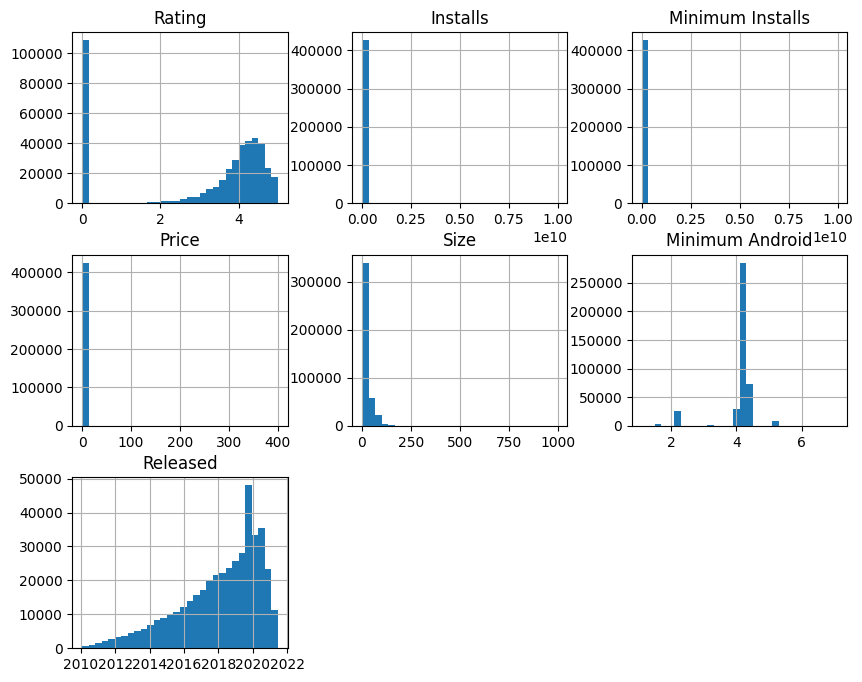

In [ ]:
# Plots histograms for all numerical features to understand their distributions.
df.hist(figsize=(10, 8), bins=30)
plt.show()

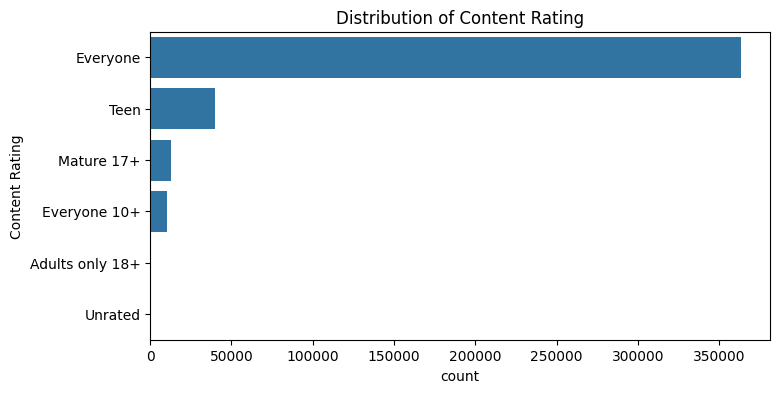

In [ ]:
# Plot bar charts for categorical columns with a limited number of unique values
categorical_cols = df.select_dtypes(include="object").columns
for col in categorical_cols:
    if df[col].nunique() < 20:  # Only plot for features with < 20 unique values
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.show()

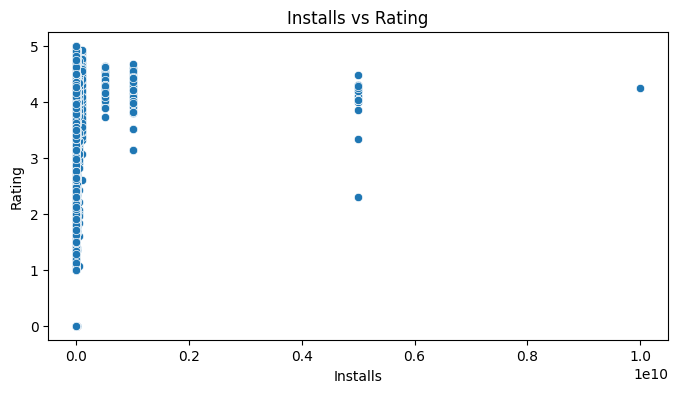

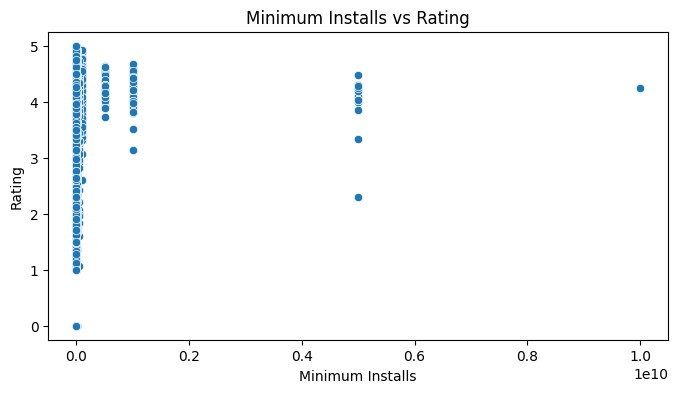

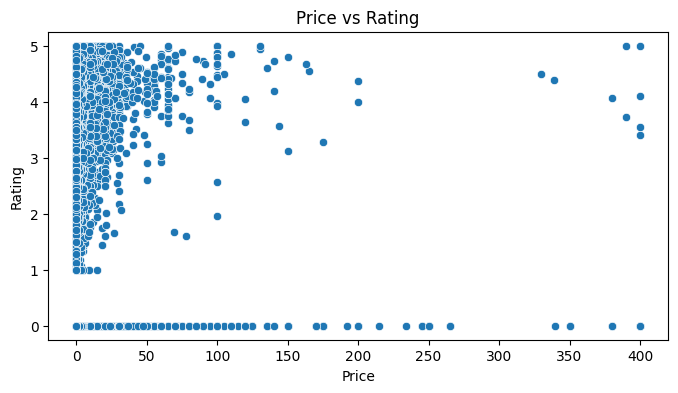

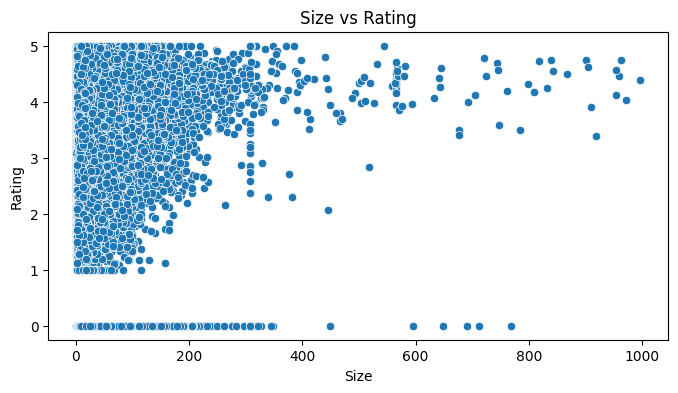

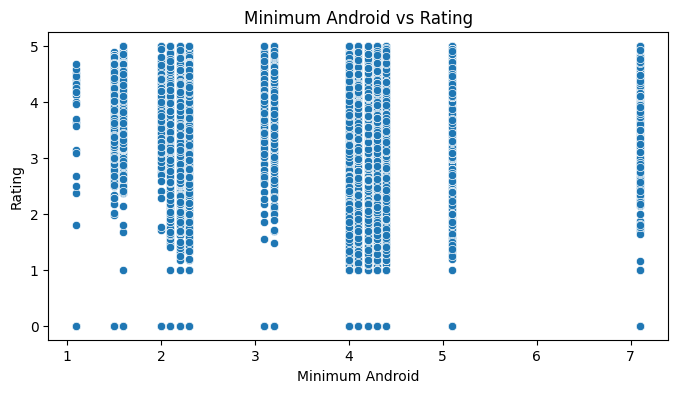

In [ ]:
# Generates scatter plots to analyze relationships between numerical columns and the target (Rating).
target_column = "Rating"

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
for col in numerical_cols:
    if col != target_column:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df[target_column])
        plt.title(f"{col} vs {target_column}")
        plt.show()

In [ ]:
# Drops unnecessary columns like IDs, version, developer, etc., which may not be useful for modeling.
columns_to_drop = [
    "App Name", "App Id", "Developer", "Version", "Summary",
    "Released", "Android version Text", "Currency", "Installs"]

df= df.drop(columns=columns_to_drop)

In [ ]:
# Identify categorical columns for encoding
categorical_cols = ["Category", "Free", "Size", "Minimum Android", "Minimum Installs", "Price",
                    "Content Rating", "Ad Supported", "In app purchases", "Editor Choice"]

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [ ]:
# Displays updated dataset info post-cleaning and column removal.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 426291 entries, 0 to 450792
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Category          426291 non-null  int64  
 1   Rating            426291 non-null  float64
 2   Minimum Installs  426291 non-null  int64  
 3   Free              426291 non-null  int64  
 4   Price             426291 non-null  int64  
 5   Size              426291 non-null  int64  
 6   Minimum Android   426291 non-null  int64  
 7   Content Rating    426291 non-null  int64  
 8   Ad Supported      426291 non-null  int64  
 9   In app purchases  426291 non-null  int64  
 10  Editor Choice     426291 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 39.0 MB


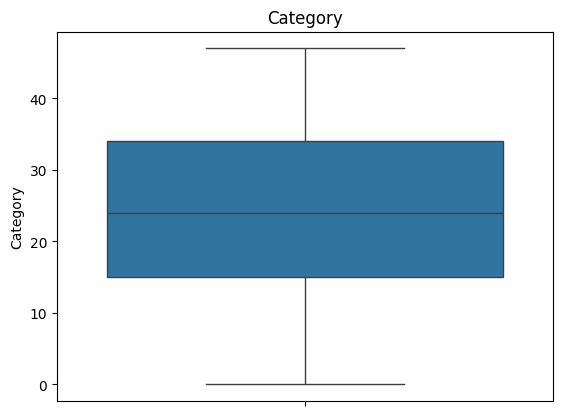

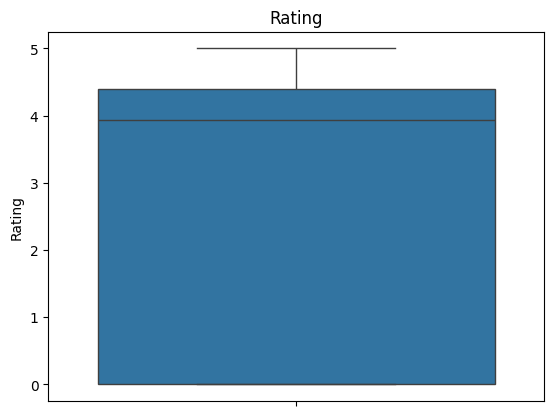

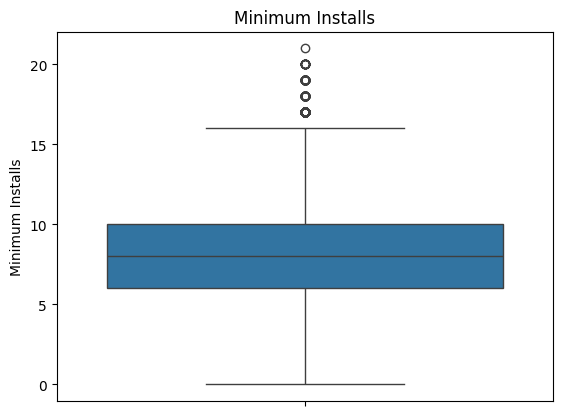

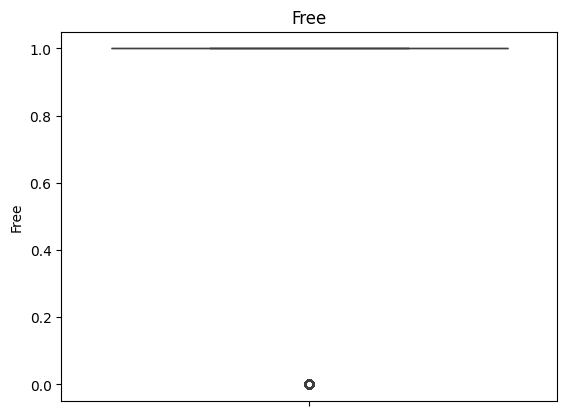

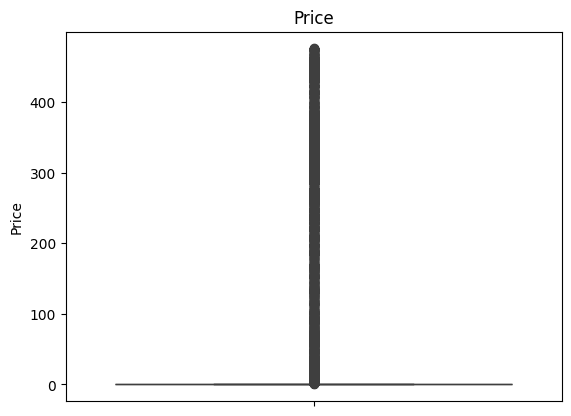

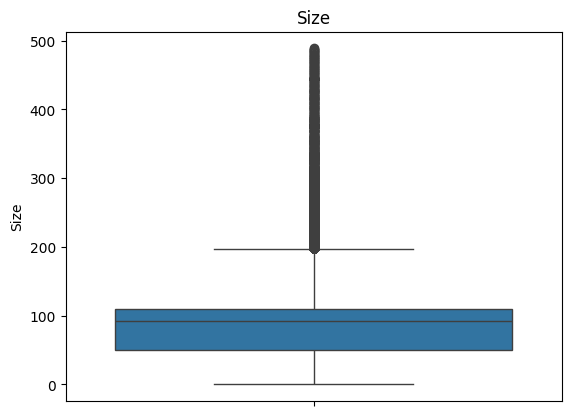

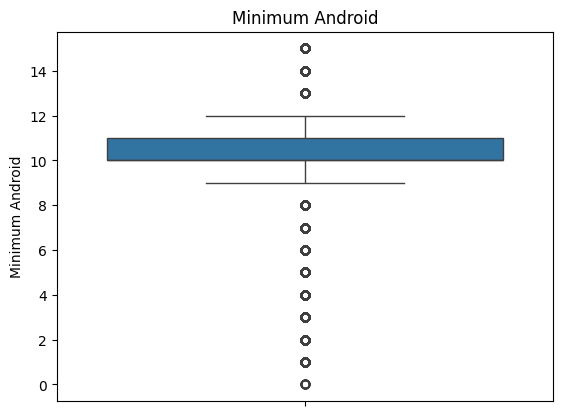

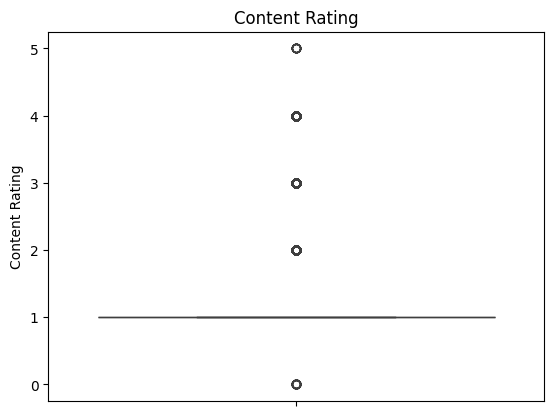

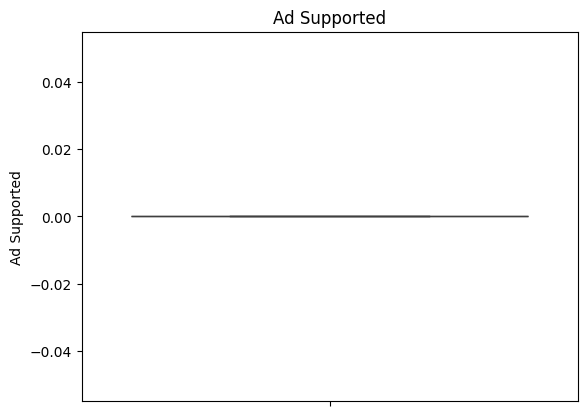

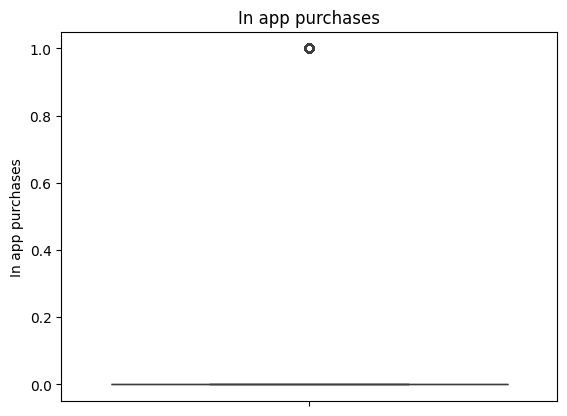

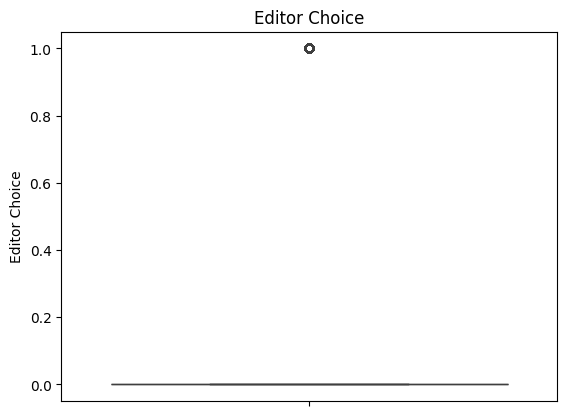

In [ ]:
#cheking outliers
# Uses box plots to check for outliers in all numerical columns.
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
#  Removes outliers using IQR method from specific columns
outlier_cols = ["Minimum Installs", "Content Rating",]

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only data within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
#  Clip outliers using IQR method from specific columns
outlier_cols = ["In app purchases", "Price", "Editor Choice", "Free","Size", "Minimum Android"]

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Clip values beyond the bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

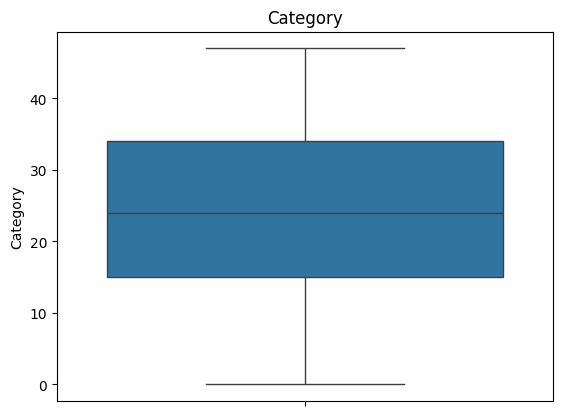

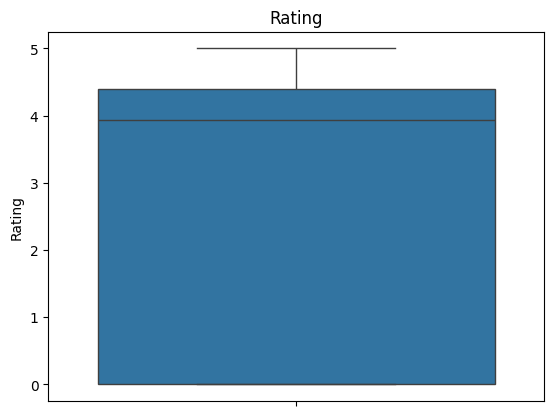

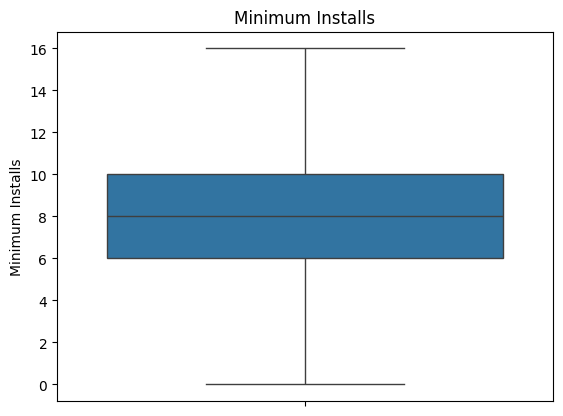

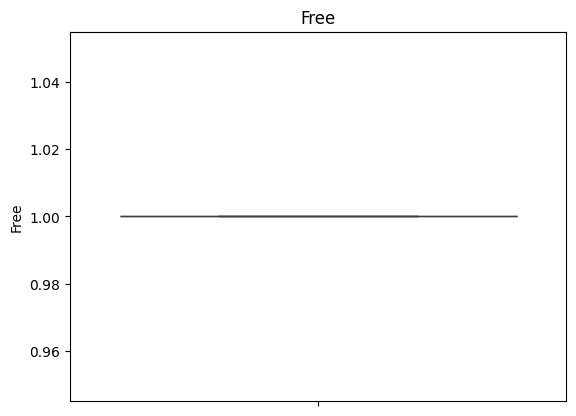

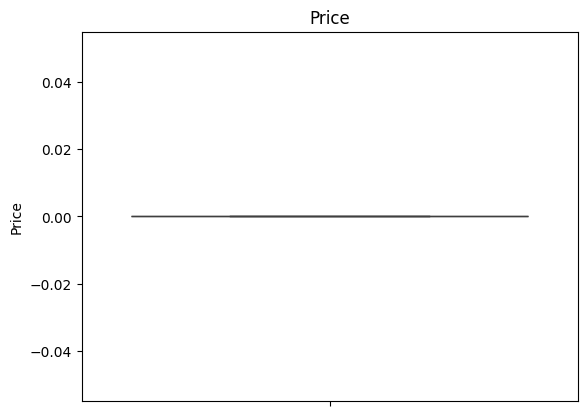

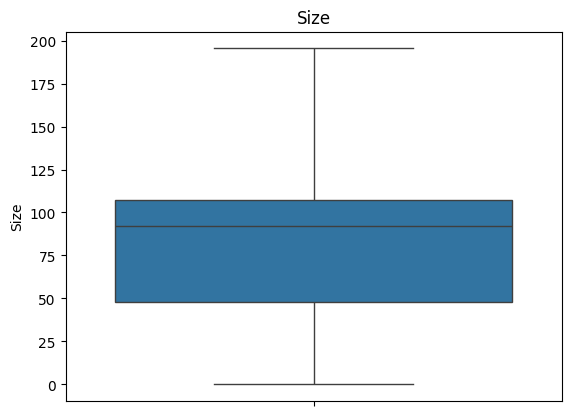

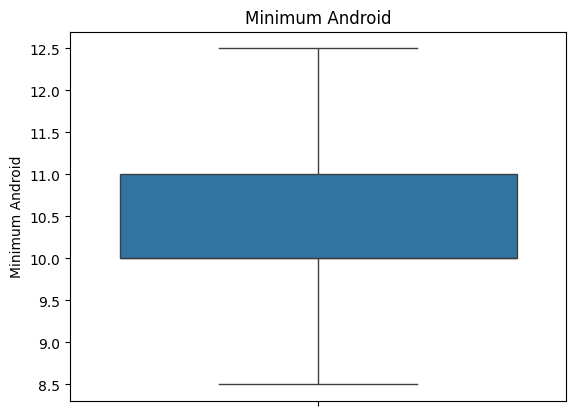

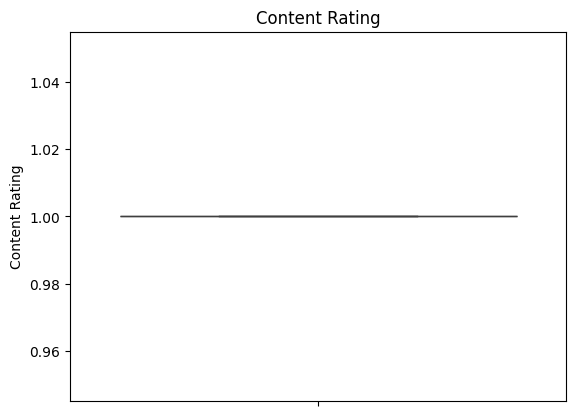

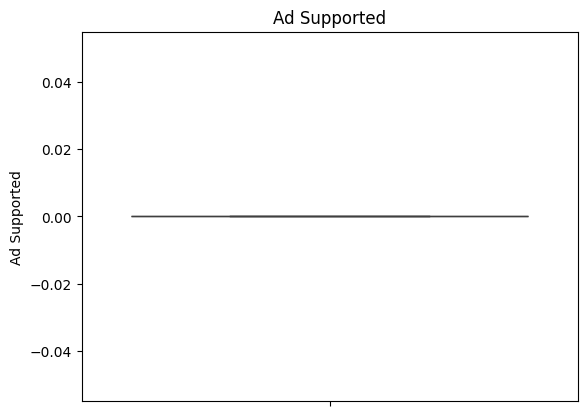

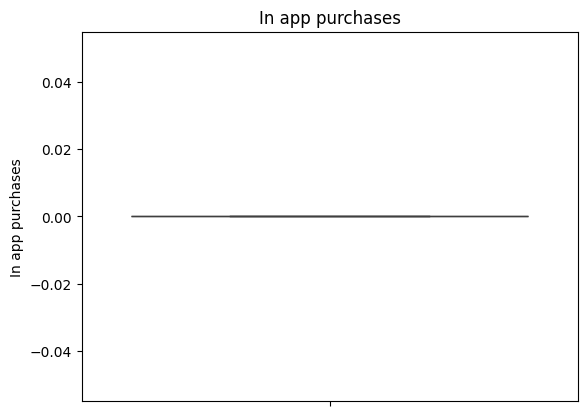

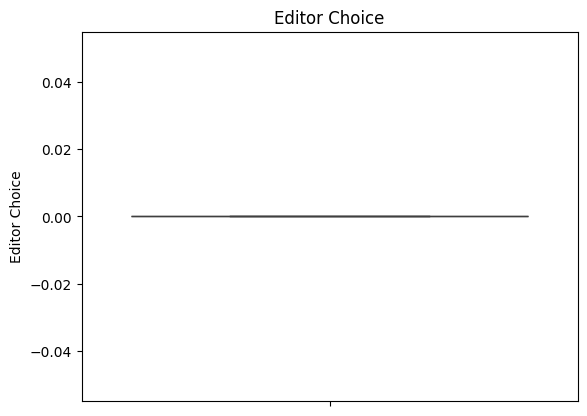

In [ ]:
# Re-checks for outliers again using box plots after more cleaning.
for i in df.select_dtypes(include=np.number).columns:
  plt.title(i)
  sns.boxplot(df[i])
  plt.show()

In [ ]:
# Displays the cleaned DataFrame head again.
df.head()

,Category,Rating,Minimum Installs,Free,Price,Size,Minimum Android,Content Rating,Ad Supported,In app purchases,Editor Choice
0,15,4.090909,9,1,0,48.0,10.0,1,0,0,0
1,29,4.000000,7,1,0,43.0,10.0,1,0,0,0
2,15,3.866667,9,1,0,47.0,10.0,1,0,0,0
3,15,4.000000,8,1,0,48.0,10.0,1,0,0,0
4,15,4.023256,10,1,0,47.0,10.0,1,0,0,0


In [ ]:
# Applies standard scaling to all numerical columns using StandardScaler.
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the scaled dataset
print(df.head())

   Category    Rating  Minimum Installs  Free  Price      Size  \
0 -0.718552  0.579100          0.365547   0.0    0.0 -0.841102   
1  0.401195  0.530527         -0.312070   0.0    0.0 -0.961509   
2 -0.718552  0.459287          0.365547   0.0    0.0 -0.865183   
3 -0.718552  0.530527          0.026739   0.0    0.0 -0.841102   
4 -0.718552  0.542953          0.704356   0.0    0.0 -0.865183   

   Minimum Android  Content Rating  Ad Supported  In app purchases  \
0        -0.313019             0.0           0.0               0.0   
1        -0.313019             0.0           0.0               0.0   
2        -0.313019             0.0           0.0               0.0   
3        -0.313019             0.0           0.0               0.0   
4        -0.313019             0.0           0.0               0.0   

   Editor Choice  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  


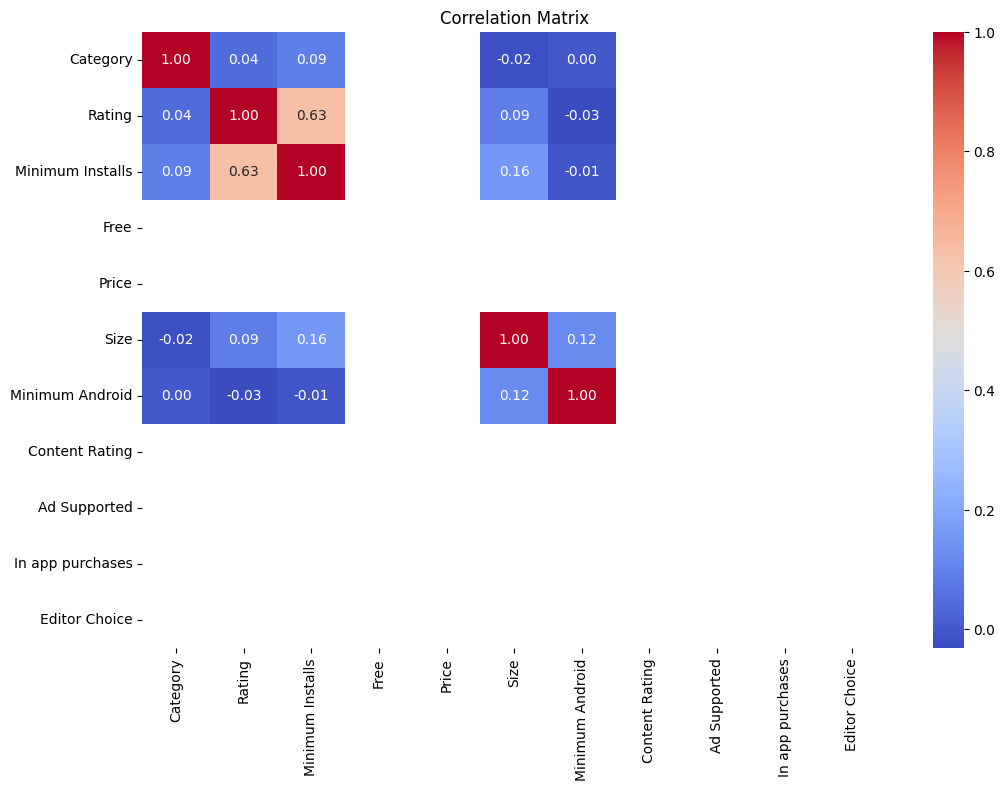

In [ ]:
# Plots a correlation heatmap to visualize relationships between numerical features.
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Splits the data into training and testing sets for model building.
from sklearn.model_selection import train_test_split
x=df.drop('Rating', axis=1)
y=df['Rating']
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 42)
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (290251, 10) (290251,)
Test set: (72563, 10) (72563,)


In [ ]:
# Linear Regression Model:-
# Builds and evaluates a Linear Regression model (prints MAE, RMSE, R²).
model=LinearRegression()
model.fit(x_train, y_train)

y_pred= model.predict(x_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test,y_pred))
print("R2 score:", r2_score(y_test, y_pred))

MAE: 0.6444632154435046
MSE: 0.6013282966290219
R2 score: 0.39803222468993416


In [ ]:
# Decision Tree Regressor:-
# Builds a Decision Tree Regressor, fits it, and evaluates performance.
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

dt_preds= dt_model.predict(x_test)
print("Decision Tree Performance:")
print("MSE:", mean_squared_error(y_test, dt_preds))
print("R2 Score:", r2_score(y_test, dt_preds))

Decision Tree Performance:
MSE: 0.6319379324503317
R2 Score: 0.3673900372497301


In [ ]:
# Random Forest Regressor:-
# Builds a Random Forest Regressor with tuning, fits it, and evaluates.
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(x_train, y_train)
rf_preds= rf_model.predict(x_test)
print("\nRandom Forest Performance:")
print("MSE:", mean_squared_error(y_test, rf_preds))
print("R2 Score:", r2_score(y_test, rf_preds))


Random Forest Performance:
MSE: 0.46250817316212883
R2 Score: 0.5369999755177125


In [ ]:
# Ridge Regression Model:-
# Builds a Ridge Regression model with regularization.
ridge_model= Ridge(alpha=1.0)  #Adjust alpha for regullarization strength
ridge_model.fit(x_train, y_train)
ridge_preds= ridge_model.predict(x_test)
print("\nRidge Regression Performance:")
print("MSE:", mean_squared_error(y_test, ridge_preds))
print("R2_score:", r2_score(y_test, ridge_preds) )


Ridge Regression Performance:
MSE: 0.6013282853136578
R2_score: 0.3980322360173316


In [ ]:
# Lasso Rregression Model:-
# Trains a Lasso Regression model to shrink and select features.
lasso_model= Lasso(alpha=0.01)  #Lasso may need smaller alpha to avoid too much feature elimination
lasso_model.fit(x_train, y_train)
lasso_preds= lasso_model.predict(x_test)
print("\nLasso Regression Performance:")
print("MSE:", mean_squared_error(y_test, lasso_preds))
print("R2_score:", r2_score(y_test, lasso_preds))


Lasso Regression Performance:
MSE: 0.6017208962726542
R2_score: 0.3976392075387545


In [ ]:
#ElasticNet Regression Model:-
# Combines Ridge & Lasso with ElasticNet Regression.
elastic_model= ElasticNet(alpha=0.01, l1_ratio=0.5)  #L1 ratio=0.5 balances Ridge & Lasso
elastic_model.fit(x_train, y_train)
elastic_preds= elastic_model.predict(x_test)
print("\nElastic Regression Performance:")
print("MSE:", mean_squared_error(y_test, elastic_preds))
print("R2_score:", r2_score(y_test, elastic_preds) )


Elastic Regression Performance:
MSE: 0.601499810890291
R2_score: 0.39786052803293515


In [ ]:
#Gradient Boost Regression:-
gbr= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(x_train, y_train)
y_pred_gbr= gbr.predict(x_test)
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

Gradient Boosting RMSE: 0.687236639608159


In [ ]:
#AdaBoost Regression
abr= AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
abr.fit(x_train, y_train)
y_pred_abr= abr.predict(x_test)
print("AdaBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_abr)))

AdaBoost RMSE: 0.7322003245528299


In [ ]:
#XGBoost Regression
xgbr= xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgbr.fit(x_train, y_train)
y_pred_xgbr= xgbr.predict(x_test)
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgbr)))

XGBoost RMSE: 0.6871343725905941


In [ ]:
# Creates a comparison table of actual vs predicted ratings across multiple models.
summary= pd.DataFrame({
    "Actual MPG:": y_test,  # Convert y_test to a NumPy array
    "Decision Tree Prediction:": dt_preds,
    "Random Forest Prediction:": rf_preds,
    "linear regression prediction:": y_pred,
    "ridge prediction:": ridge_preds,
    "lasso regression:": lasso_preds,
    "elasticnet prediction:": elastic_preds,
    "Gradient Boosting Prediction:": y_pred_gbr,
    "AdaBoost Prediction:": y_pred_abr,
    "XGBoost Prediction:": y_pred_xgbr,
})
print("\nPrediction Summary:")
summary.head()


Prediction Summary:


,Actual MPG:,Decision Tree Prediction:,Random Forest Prediction:,linear regression prediction:,ridge prediction:,lasso regression:,elasticnet prediction:,Gradient Boosting Prediction:,AdaBoost Prediction:,XGBoost Prediction:
320116,-1.606675,-1.606675,-1.544302,-1.054608,-1.054604,-1.032396,-1.036853,-1.466949,-1.040867,-1.467243
311000,0.501384,0.545369,0.613631,0.048298,0.048298,0.041747,0.046198,0.568820,0.311062,0.564725
182440,-1.606675,0.637387,-0.028753,-0.155761,-0.155761,-0.174126,-0.166976,0.073530,-0.125655,0.061466
413266,0.311464,0.549180,0.629433,0.268229,0.268228,0.236002,0.246710,0.609739,0.311062,0.613967
295270,-1.606675,-1.262493,-1.113596,-0.626870,-0.626868,-0.611086,-0.614401,-0.975752,-0.652693,-0.978265


# **Final Conclusion:**
**Google Play Store App Rating Prediction:**

In this project, various regression models were evaluated to predict app ratings on the Google Play Store based on features like app category, number of installs, size, reviews, and more.

**After training and comparing multiple models** — including linear regression variants and tree-based ensemble methods — the results clearly show that:

**Tree-based ensemble models** (especially Random Forest, XGBoost, and Gradient Boosting) performed significantly better than simple linear models.

The Random Forest Regressor achieved the lowest MSE (0.4625) and the highest R² Score (0.5370), making it the most effective model for this task.

**Linear models** (Linear, Ridge, Lasso, ElasticNet) had similar and higher MSEs (~0.601), suggesting they were unable to capture the complex, non-linear relationships in the data.

XGBoost and Gradient Boosting were close competitors, offering nearly equivalent performance to Random Forest, with the added benefit of speed and fine-tuning flexibility.

**Key Insight:**

App ratings are influenced by complex, non-linear interactions between features, which makes tree-based models ideal for this kind of prediction task.